# LGI Assumptions

This notebook creates graphs for each group and examines if they differ from random graphs.

The first part of the script imports the data and creates graphs.

In [1]:
import pandas as pd
from scona.visualisations import plot_degree_dist
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_style('dark')

import functions.statistical_functions as Sfun
import functions.plotting_functions as Pfun
import functions.scn_functions as ScnFun

This code creates the enviornmental variable for where the data is stored. Create a .env file in the directory with the file path to data.

In [2]:
from decouple import config

data = config('data')
results = config('results')

In [3]:
lh_lgi = pd.read_csv(f'{data}/lh_lgi.dat',sep='\t').drop([
                     'BrainSegVolNotVent', 'eTIV'],axis=1).rename(columns={'lh.aparc.pial_lgi.thickness':'G-Number'})
                     
rh_lgi =  pd.read_csv(f'{data}/rh_lgi.dat',sep='\t').drop([
                       'BrainSegVolNotVent', 'eTIV','rh.aparc.pial_lgi.thickness'],axis=1)

group = pd.read_csv(f'{data}/cortical_measures.csv').iloc[0:,2]
lgi = pd.concat([lh_lgi, rh_lgi, group],axis=1)

names = list(lgi.columns.drop(['G-Number','age_adjusted_group']))

centroids = pd.read_csv(f'{data}/atlas.csv') #This atlas was obtained from braingraph R package
centroids = centroids[['x.mni', 'y.mni', 'z.mni']].to_numpy()

group = lgi.groupby('age_adjusted_group')
aan = group.get_group('AAN').reset_index(drop=True)
hc = group.get_group('HC').reset_index(drop=True)
wr = group.get_group('WR').reset_index(drop=True)

In [4]:
aan_graphs = Sfun.create_graphs(aan.iloc[:,1:69], names, centroids)
wr_graphs = Sfun.create_graphs(wr.iloc[:,1:69], names, centroids)
hc_graphs = Sfun.create_graphs(hc.iloc[:,1:69], names, centroids)

## Creation of Random Graphs.

This simulates random graphs to check that the actual graph differ from random graphs

In [5]:
brain_bundle_aan = Sfun.permutations(aan_graphs['graph_threshold'], results, name='AAN_LGI', perms=1000)

Loading CSVs


In [6]:
brain_bundle_wr = Sfun.permutations(wr_graphs['graph_threshold'], results, name='WR_LGI', perms=1000)

Loading CSVs


In [7]:
brain_bundle_hc = Sfun.permutations(hc_graphs['graph_threshold'], results, name='HC_LGI', perms=1000)

Loading CSVs


## View distibution of the simulated random graphs.

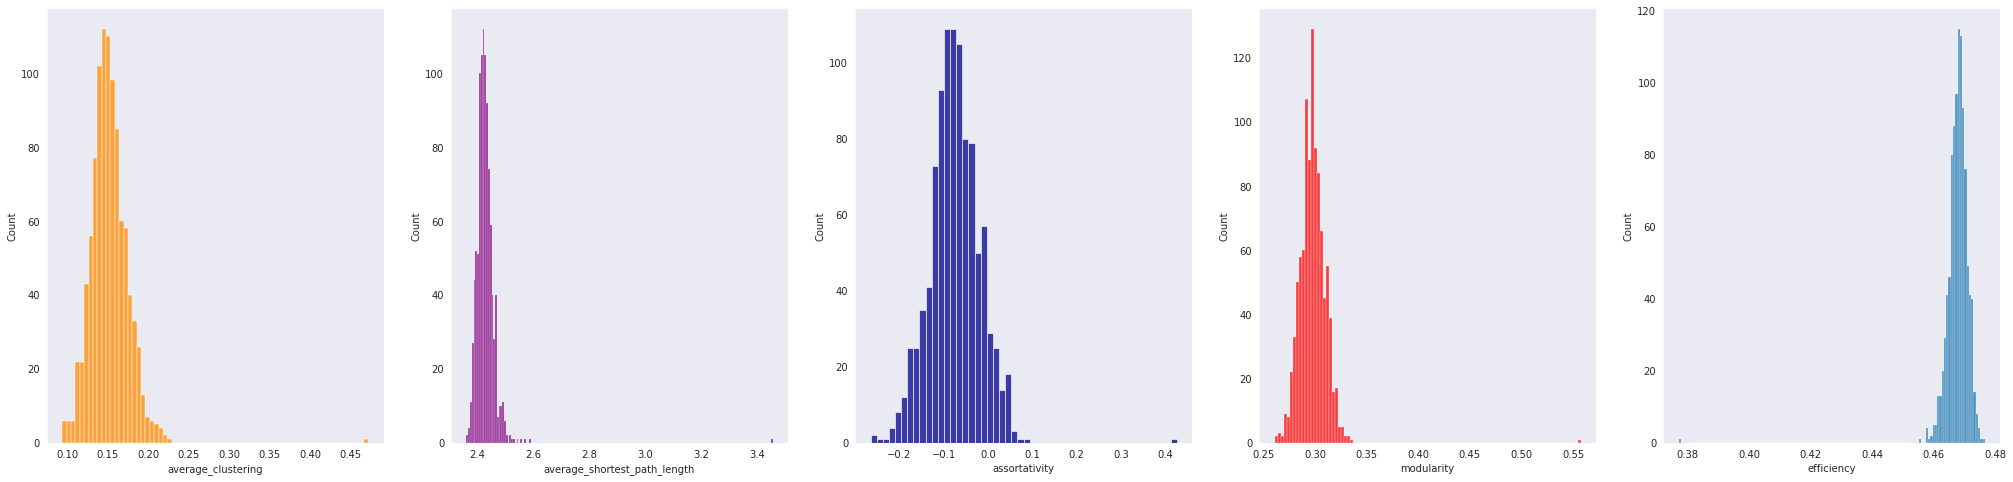

In [8]:
Pfun.distro_plots(brain_bundle_aan['global_measures'])

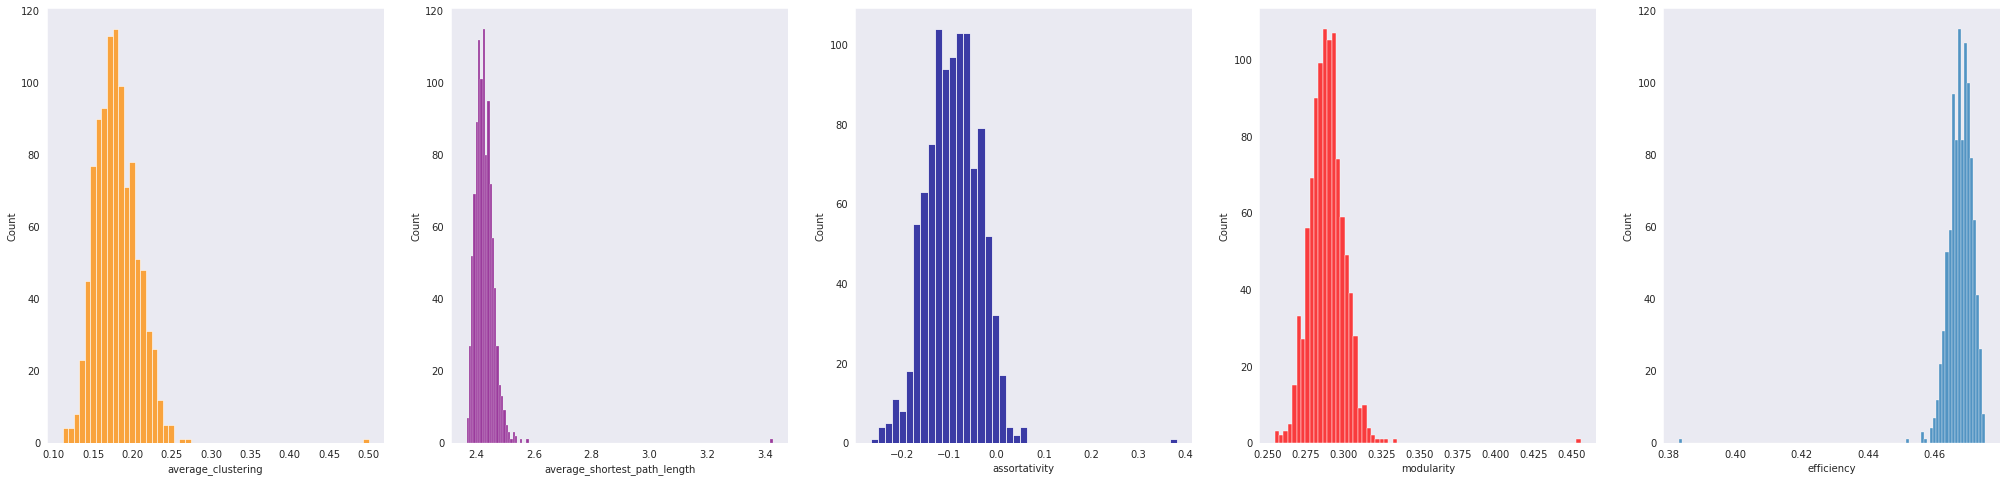

In [9]:
Pfun.distro_plots(brain_bundle_wr['global_measures'])

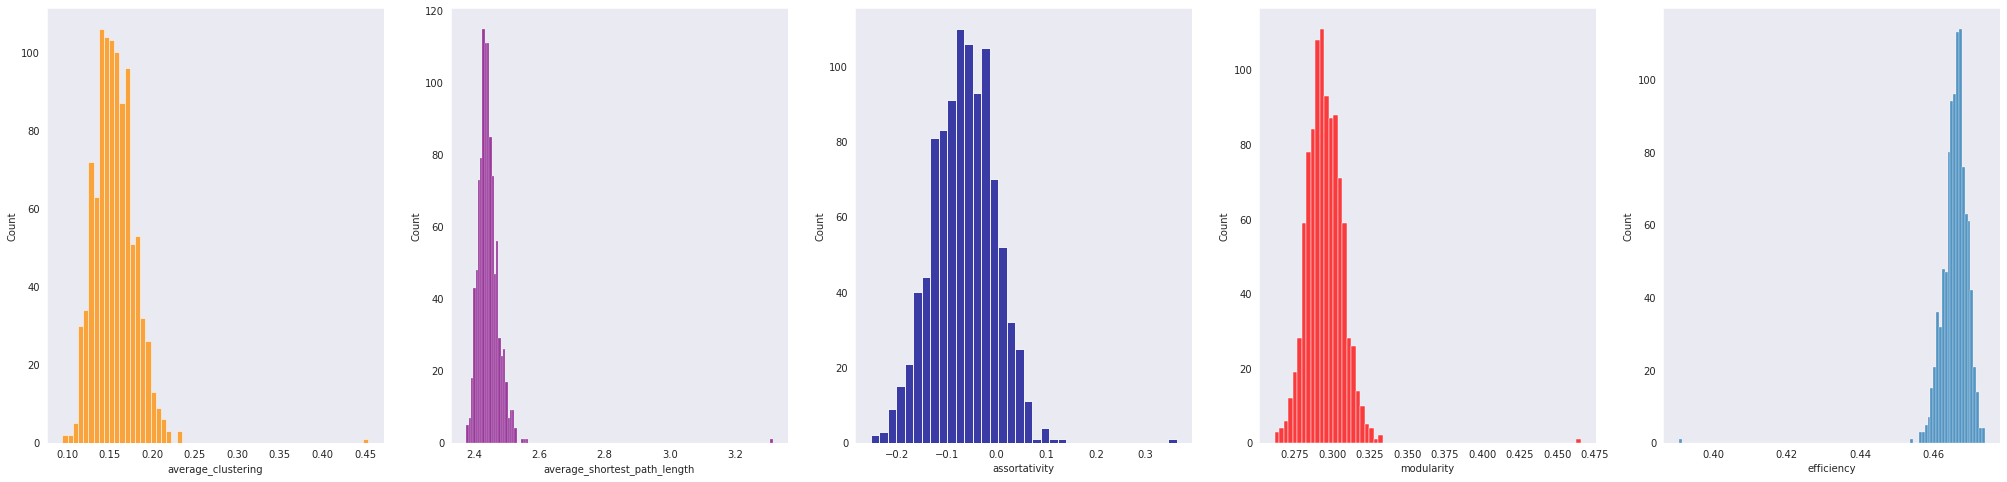

In [10]:
Pfun.distro_plots(brain_bundle_hc['global_measures'])

## Plotting degree distribution

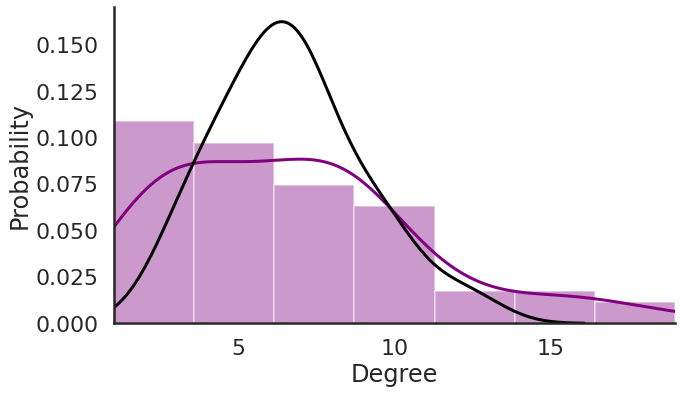

In [12]:
plot_degree_dist(aan_graphs['graph_threshold'], color=["purple", "black"])

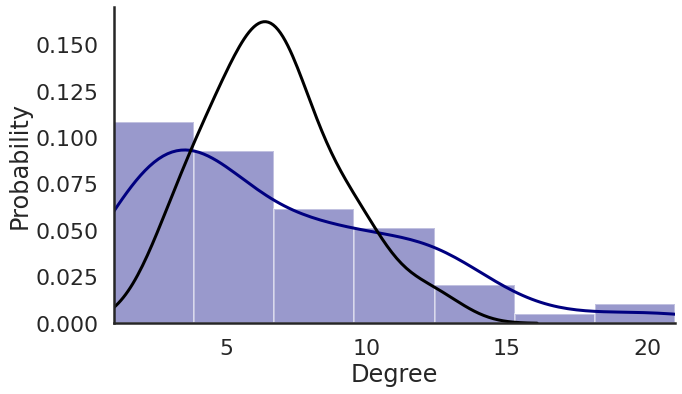

In [13]:
plot_degree_dist(wr_graphs['graph_threshold'], color=["navy", "black"])

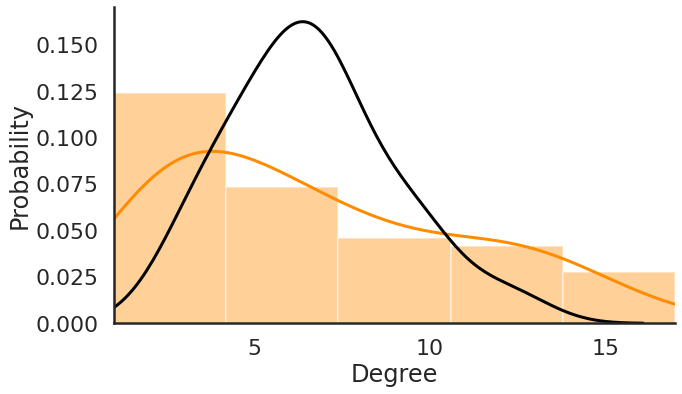

In [14]:
plot_degree_dist(hc_graphs['graph_threshold'], color=["darkorange", "black"])

In [11]:
aan_graphs['graph_threshold'].calculate_nodal_measures()
nodal_df = aan_graphs['graph_threshold'].report_nodal_measures()
nodal_df.head()

,name,centroids,x,y,z,module,degree,closeness,betweenness,shortest_path_length,clustering,participation_coefficient
0,lh_bankssts_thickness,"[-56.0, -44.0, 5.0]",-56.0,-44.0,5.0,0,2,0.26378,0.0,3.735294,1.0,0.0
1,lh_caudalanteriorcingulate_thickness,"[-2.0, 21.0, 27.0]",-2.0,21.0,27.0,1,6,0.326829,0.022937,3.014706,0.466667,0.305556
2,lh_caudalmiddlefrontal_thickness,"[-45.0, 18.0, 46.0]",-45.0,18.0,46.0,2,8,0.328431,0.000201,3.0,0.928571,0.0
3,lh_cuneus_thickness,"[-1.0, -82.0, 20.0]",-1.0,-82.0,20.0,3,6,0.283898,0.005679,3.470588,0.8,0.0
4,lh_entorhinal_thickness,"[-16.0, -10.0, -29.0]",-16.0,-10.0,-29.0,4,3,0.223333,0.029851,4.411765,0.333333,0.0


In [26]:
aan_graphs['graph_threshold'].report_small_world()

AttributeError: 'BrainNetwork' object has no attribute 'report_small_world'

## Plotting global Measures.

In [24]:
brain_bundle_aan['small_world']
#report_small_world()

,small_world_coefficient
Unnamed: 0,
AAN_LGI_thresholded,1.000000
AAN_LGI_thresholded_R0,2.537075
AAN_LGI_thresholded_R1,2.600805
AAN_LGI_thresholded_R2,2.457346
AAN_LGI_thresholded_R3,2.691874
...,...
AAN_LGI_thresholded_R995,2.626896
AAN_LGI_thresholded_R996,2.717713
AAN_LGI_thresholded_R997,2.267376


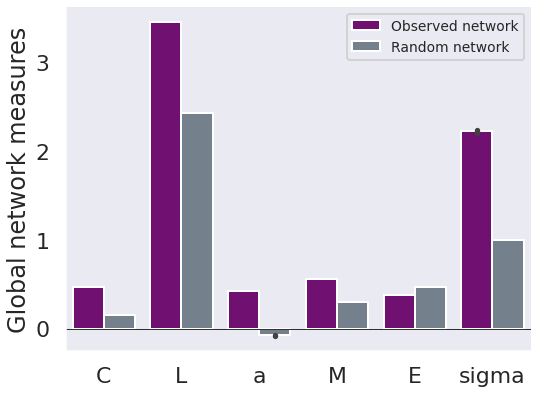

In [17]:
ScnFun.network_measures_plot(brain_bundle_aan, 'AAN_LGI_thresholded', color=['purple','slategrey'], ci=95)

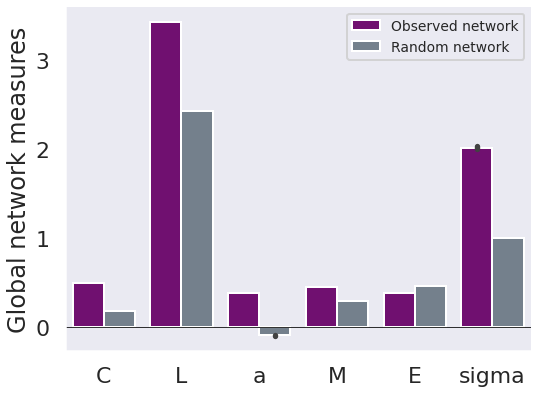

In [18]:
ScnFun.network_measures_plot(brain_bundle_wr, 'WR_LGI_thresholded', color=['purple','slategrey'], ci=95)

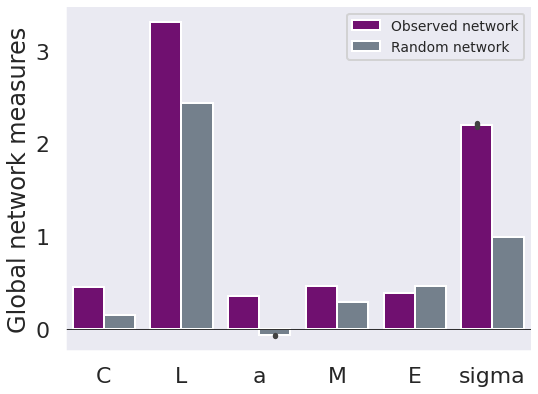

In [19]:
ScnFun.network_measures_plot(brain_bundle_hc, 'HC_LGI_thresholded', color=['purple','slategrey'], ci=95)

## Plotting rich club

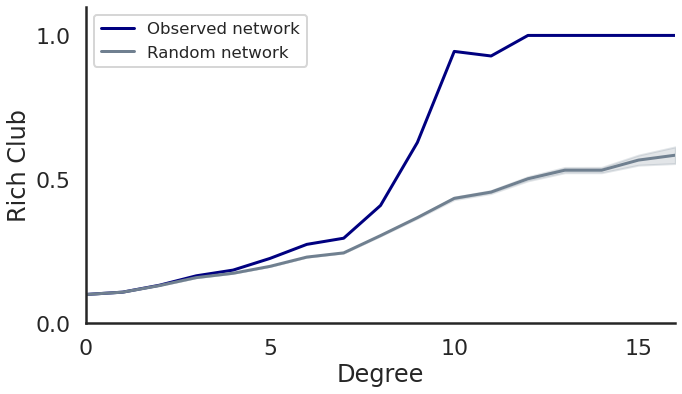

In [20]:
ScnFun.rich_club_plot(brain_bundle_aan, color=['navy','slategrey'], original_network='AAN_LGI_thresholded')

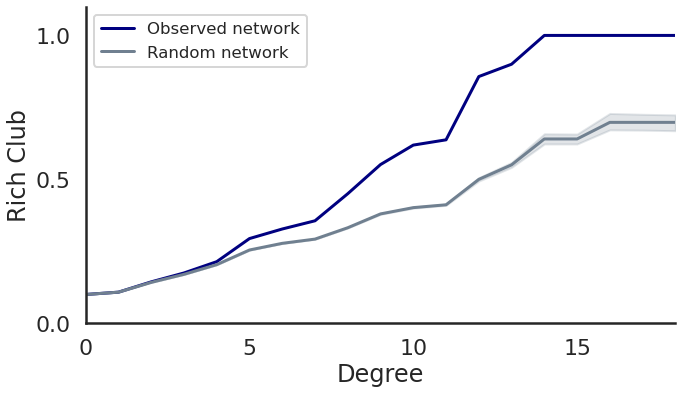

In [21]:
ScnFun.rich_club_plot(brain_bundle_wr, color=['navy','slategrey'], original_network='WR_LGI_thresholded')

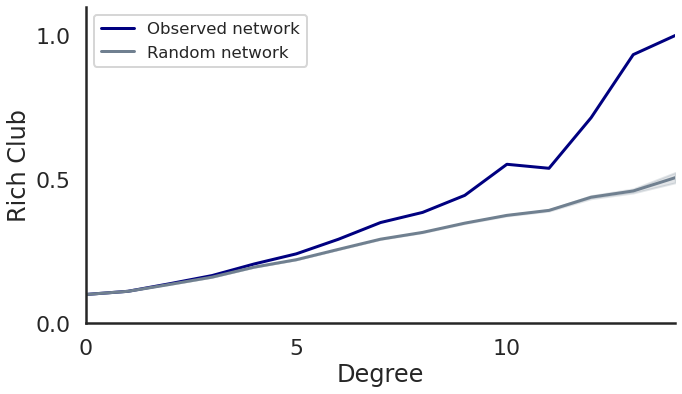

In [22]:
ScnFun.rich_club_plot(brain_bundle_hc, color=['navy','slategrey'], original_network='HC_LGI_thresholded')